<a href="https://colab.research.google.com/github/eugeinga/CODER-DataScienceI/blob/main/TP_Data_Science_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.express as px

sns.set_theme(style="whitegrid", palette="pastel") # Estilo de seaborn


## **Acerca del set de datos**

### **Wine Quality Data Set (Red & White Wine):** <https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine>

#### Este conjunto de datos contiene registros relacionados con las variedades tinto y blanco del vino Vinho Verde portugués. Contiene información de 1599 muestras de vino tinto y 4898 muestras de vino blanco.
#### Las variables de entrada en el conjunto de datos consisten en el tipo de vino (tinto o blanco) y métricas de pruebas objetivas (por ejemplo, niveles de acidez, valores de PH, ABV, etc.), mientras que la variable objetivo/salida es una puntuación numérica basada en datos sensoriales - (de al menos 3 evaluaciones realizadas por expertos en vino). Cada experto calificó la calidad del vino entre 0 (muy mala) y 10 (muy excelente).
#### Por cuestiones de privacidad y logística, no hay datos sobre tipos de uva, marca de vino y precio de venta del vino.

In [2]:
# Lectura del dataset

#url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceI/main/wine-quality-white-and-red.csv"
url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceI/main/winequalityN.csv"
df=pd.read_csv(url,sep=',',header=0)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## **Variables bajo estudio**

* **type:** Tipo de vino (blanco o tinto)
* **fixed acidity:** Acidez fija | Rango Típico: 4.0 - 9.0 g/L
* **volatile acidity:** Acidez volátil | Rango Típico: 0.2 - 1.0 g/L
* **citric acid:** Ácido cítrico | Rango Típico: 0 - 0.5 g/L
* **residual sugar:** Azúcal residual | Rango Típico: 1.0 - 45.0 g/L
* **chlorides:** Cloruros | Rango Típico: 0.01 - 0.2 g/L
* **free sulfur dioxide:** Dióxido de azufre libre | Rango Típico: 10 - 50 mg/L
* **total sulfur dioxide:** Dióxido de azufre total | Rango Típico: 50 - 150 mg/L
* **density:** Densidad | Rango Típico: 0.990 - 1.010 g/cm³
* **pH:** PH | Rango Típico: 3.0 - 4.0
* **sulphates:** Sulfatos | Rango Típico: 0.3 - 0.6 g/L
* **alcohol:** Alcohol | Rango Típico: 8% - 15%
* **quality:** Calidad


In [3]:
# Información de resumen del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# Información sobre las dimensiones del dataset [filas, columnas]

df.shape

(6497, 13)

In [5]:
# A fin de poder operar con los valores numéricos de todas las columnas convierto todas las columnas que no sean numéricas
# De esta manera garantizo que cualquier columna que pueda ser convertida a un tipo de dato numérico lo sea.

df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  0 non-null      float64
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 660.0 KB


In [6]:
# Estadística descriptiva del dataset

df.describe().round(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,0.0,6487.00,6489.00,6494.00,6495.00,6495.00,6497.00,6497.00,6497.00,6488.00,6493.00,6497.00,6497.00
mean,NaN,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,NaN,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,NaN,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,NaN,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,NaN,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,NaN,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,NaN,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


## **Manejo de valores faltantes**


#### Contabilizo los datos nulos por columnas

In [7]:
# Contabilizo los datos nulos/faltantes por columna.

#print(df.isnull().sum())
print(df.isna().sum())

type                    6497
fixed acidity             10
volatile acidity           8
citric acid                3
residual sugar             2
chlorides                  2
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         9
sulphates                  4
alcohol                    0
quality                    0
dtype: int64


#### Elimino las filas con más de 2 valores NAN

In [8]:
# Elimino las filas con más de 2 valores NAN

df.dropna(thresh=2)
df.shape

(6497, 13)

#### Reemplazo los datos faltantes con la media de cada columna

In [9]:
# Reemplazo los datos faltantes con la media

df.fillna(df.mean(), inplace=True)
print(df.isna().sum())

type                    6497
fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
dtype: int64


## **Valores sospechosos**

#### Son valores sospechosos:
* los valores en cero (a excepción de 'ácido cítrico'),
* los valores negativos (aunque según los datos estadísticos no hay columnas con valores mínimos negativos).

In [10]:
# Se contabilizan los datos que son menores a 0 (cero) en las columnas que según el ambito de estudio no admiten valores ceros o negativos.

valoresnulos = (df[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] <= 0).sum()
print(valoresnulos)

fixed acidity           0
volatile acidity        0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [11]:
# Calculo el coeficiente de variación (CV) de las distintas columnas a fin de determinar la dispersión de los conjunto de datos respecto a la media.
#Si el CV es <= 30% se dice que los datos son relativamente homogéneos.

encabezados = df.columns.values

for i in range(len(encabezados)):
  coefVar = (df[encabezados[i]].std() / df[encabezados[i]].mean()) * 100
  print(f"CV {encabezados[i]}: {coefVar.round(2)}")


CV type: nan
CV fixed acidity: 17.96
CV volatile acidity: 48.44
CV citric acid: 45.57
CV residual sugar: 87.38
CV chlorides: 62.51
CV free sulfur dioxide: 58.15
CV total sulfur dioxide: 48.83
CV density: 0.3
CV pH: 4.99
CV sulphates: 28.01
CV alcohol: 11.37
CV quality: 15.01


In [12]:
df.nunique()

,0
type,0
fixed acidity,107
volatile acidity,188
citric acid,90
residual sugar,317
chlorides,215
free sulfur dioxide,135
total sulfur dioxide,276
density,998
pH,109


## **Análisis de variables categóricas**

In [13]:
# Cambio el tipo de variable de "type" y "quality" para que sea considerada una variable categórica

url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceI/main/winequalityN.csv"
df2=pd.read_csv(url,sep=',',header=0)

df2['type'] = df2['type'].astype('category')
df2['quality'] = df2['quality'].astype('category')
df2.dtypes


,0
type,category
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64


In [14]:
df2.describe(include='category').round(2)

,type,quality
count,6497,6497
unique,2,7
top,white,6
freq,4898,2836


In [15]:
# Cuento la frecuencia de cada categoría

df2['quality'].value_counts().sort_index()

,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


In [16]:
# Calculo la proporción de cada frecuencia

(df2['quality'].value_counts(normalize=True) * 100).round(2).sort_index()

,proportion
quality,
3,0.46
4,3.32
5,32.91
6,43.65
7,16.61
8,2.97
9,0.08


In [17]:
# Agrupo los datos por tipo y calidad

df2Agrupado = df2.groupby(['type', 'quality'], observed=False).size().reset_index(name='counts')
df2Agrupado

,type,quality,counts
0,red,3,10
1,red,4,53
2,red,5,681
3,red,6,638
4,red,7,199
5,red,8,18
6,red,9,0
7,white,3,20
8,white,4,163
9,white,5,1457


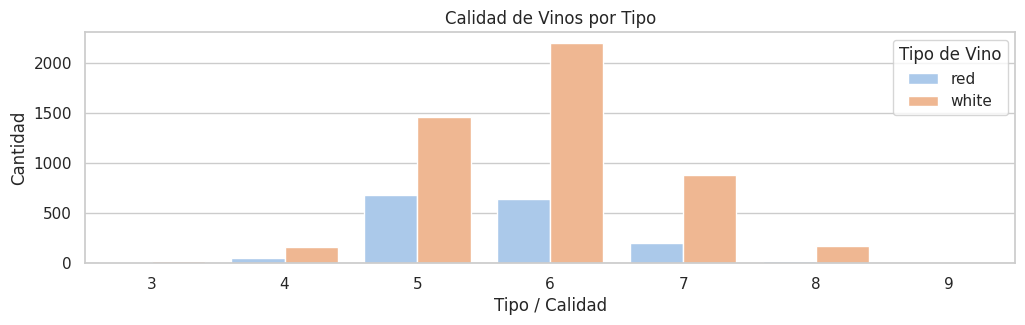

In [18]:
plt.figure(figsize=(12,3))
sns.barplot(x='quality', y='counts', hue='type', data=df2Agrupado)
#sns.barplot(x='type', y='counts', hue='quality', data=df2Agrupado)

plt.title('Calidad de Vinos por Tipo')
plt.xlabel('Tipo / Calidad')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Vino')
plt.show()

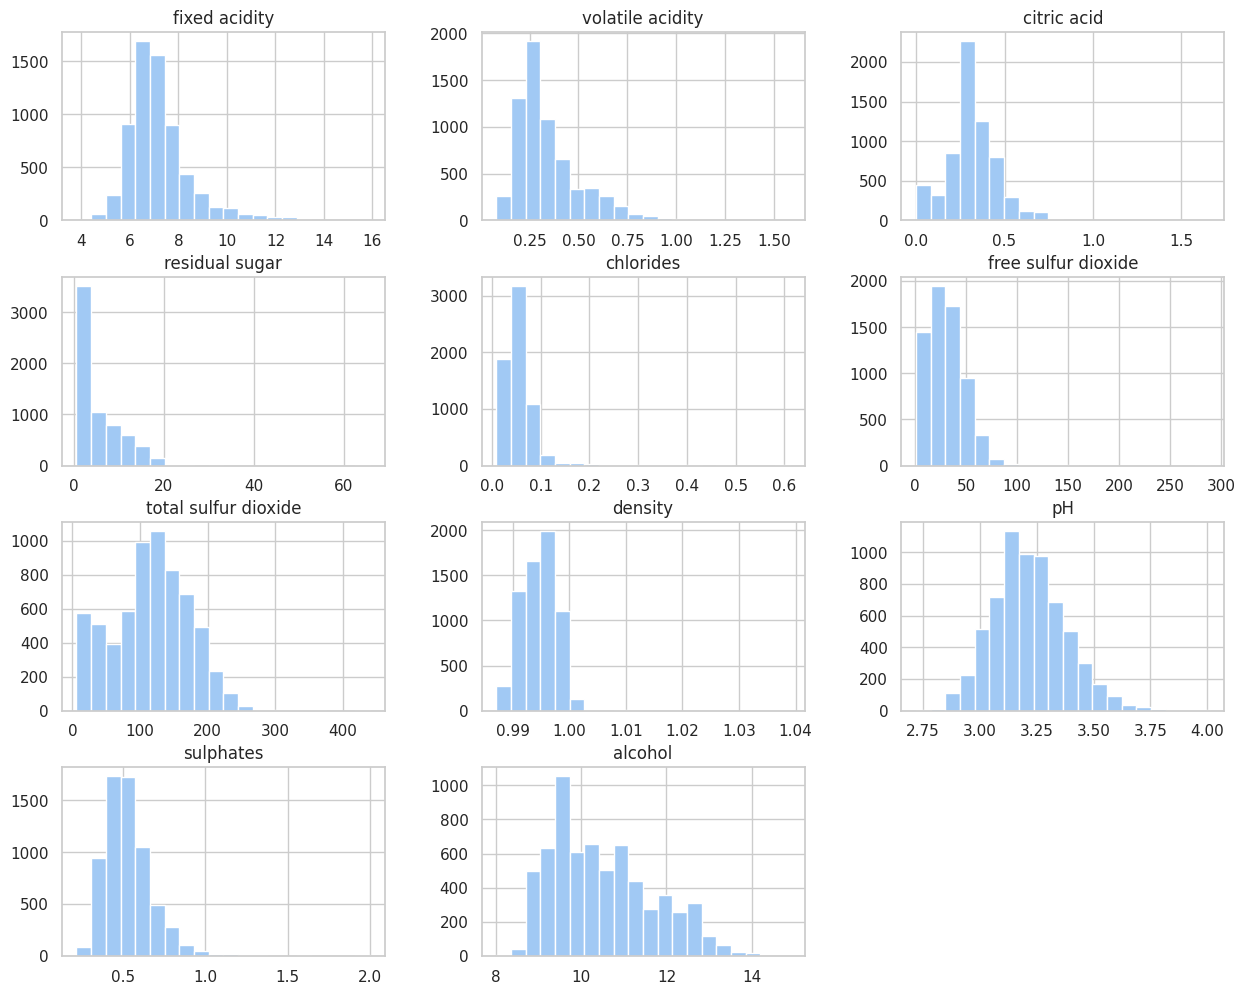

In [31]:
# Creo histogramas para analizar la distribución de las distintas variables

df[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].hist(figsize=(15, 12), bins=20)
plt.show()

### **Análisis de Outliers**

TypeError: Axes.bxp() got an unexpected keyword argument 'hued'

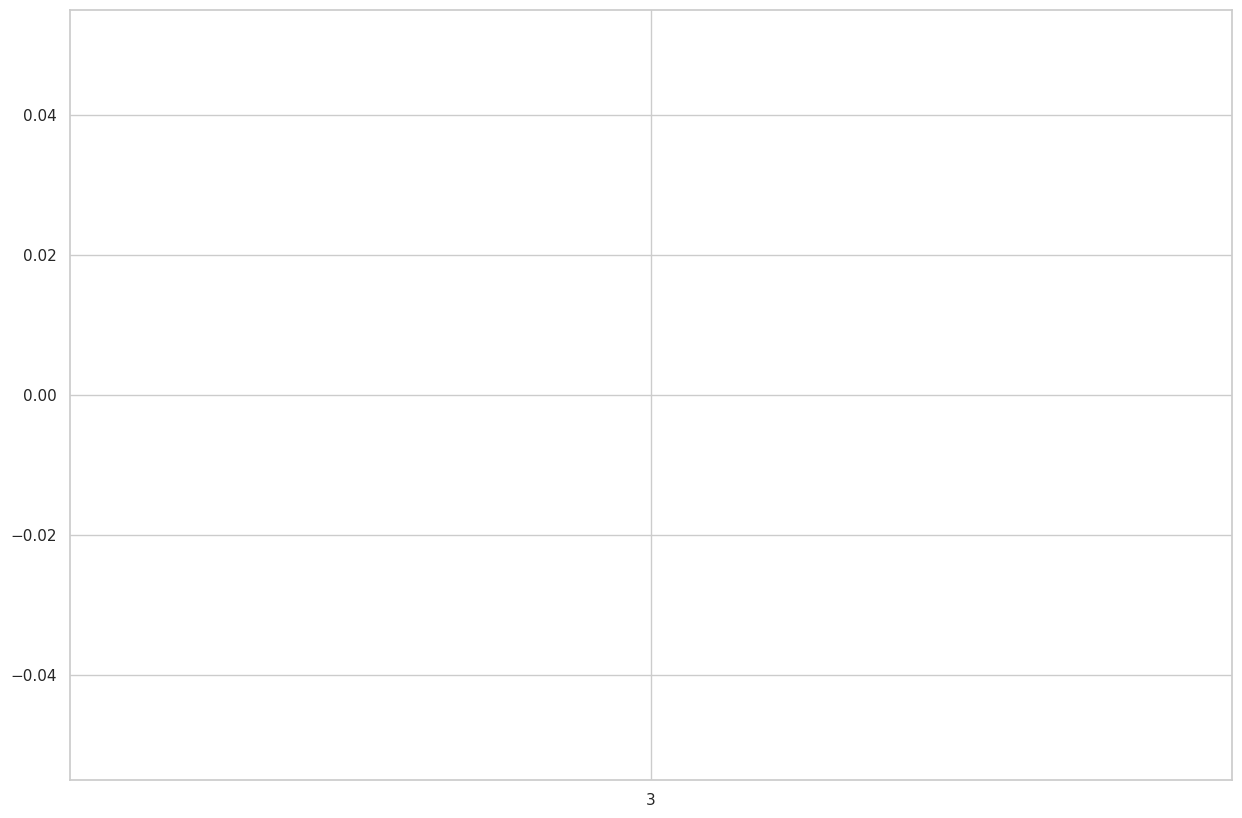

In [20]:
plt.figure(figsize=(15,10))
#sns.boxplot(data=df['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])
#sns.boxplot(data=df['fixed acidity','volatile acidity'])
sns.boxplot(x=df['quality'], y=df['fixed acidity'], hued=df['type'])

plt.title('Boxplots para Identificar Outliers en Todas las Variables')
plt.xticks(rotation=45)  # Roto las etiquetas del eje x para que sean legibles
plt.ylabel('Valor')
plt.xlabel('Tipo / Calidad')
plt.legend(title='Tipo de Vino')
plt.show()


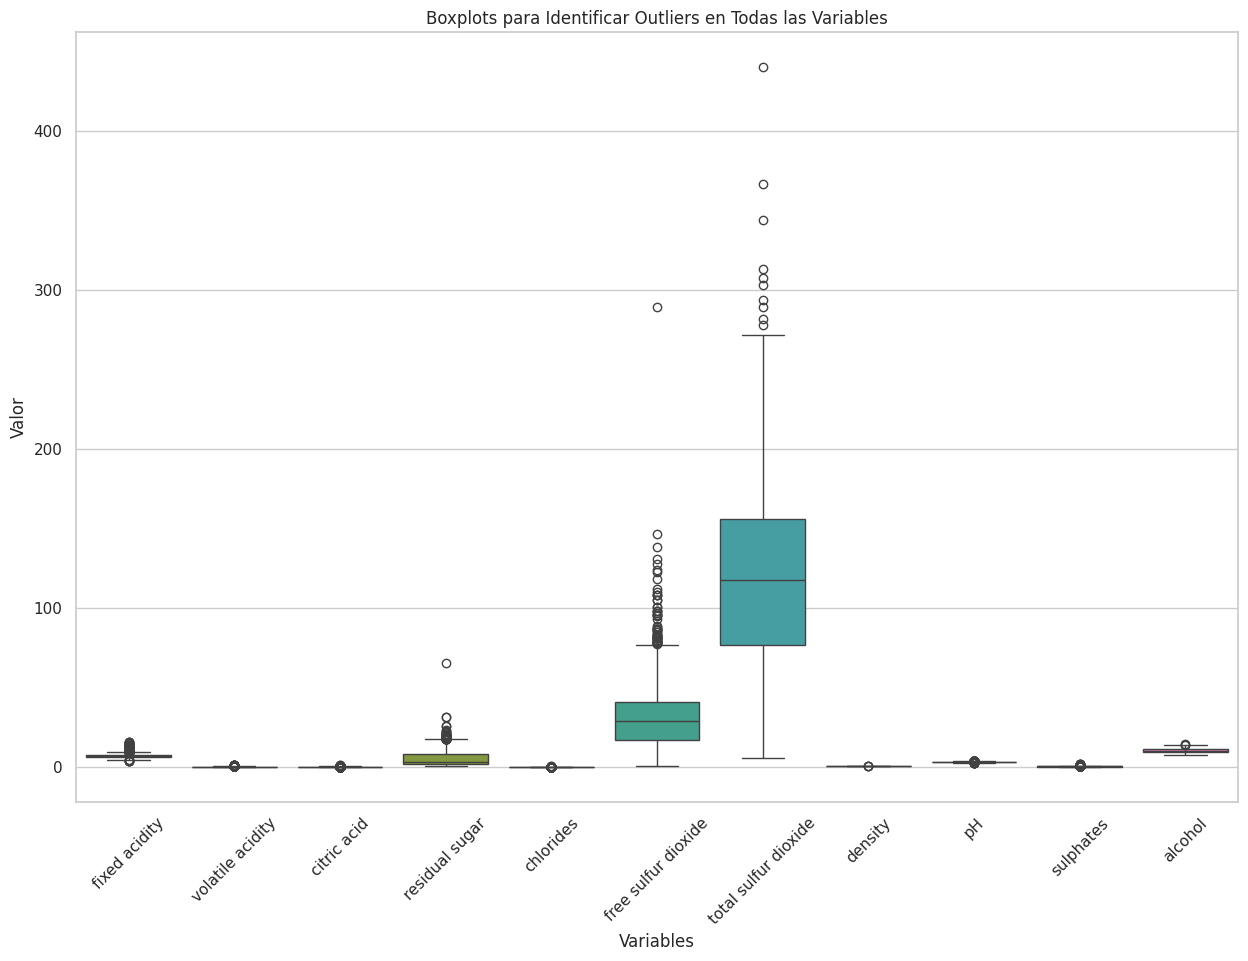

In [33]:
# prompt: crear boxplots para las variables: 'fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates', y 'alcohol'

plt.figure(figsize=(15,10))
sns.boxplot(data=df[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

plt.title('Boxplots para Identificar Outliers en Todas las Variables')
plt.xticks(rotation=45)  # Roto las etiquetas del eje x para que sean legibles
plt.ylabel('Valor')
plt.xlabel('Variables')
plt.show()
